# Valores Atipicos_Outliers 
**Los outliers, o valores atípicos,** son observaciones en un conjunto de datos que difieren significativamente del resto de las observaciones. Estos valores pueden ser inusualmente altos o bajos en comparación con el conjunto de datos en su totalidad y pueden surgir por una variedad de razones.

**Es importante antes de gestionar los valores atipicos**:
* Entender el contexto: Antes de tomar decisiones sobre cómo tratar los outliers, comprende la naturaleza de tus datos y la importancia de cada variable en tu análisis.
* Validación: Después de aplicar correcciones, valida tus resultados para asegurarte de que el tratamiento de outliers no distorsiona la verdadera distribución de tus datos.
* Considerar modelos robustos: Si los outliers son un desafío constante, considera el uso de modelos más robustos que sean menos sensibles a estos valores atípicos.

**Los outliers pueden clasificarse en varias categorías, cada una con implicaciones distintas**:

* Errores de procedimiento: Estos outliers surgen de errores en la recopilación, entrada o codificación de datos. Pueden corregirse durante el preprocesamiento de datos eliminándolos o recodificándolos como datos ausentes.

* Eventos extraordinarios: Algunos outliers pueden surgir debido a eventos inusuales o extremos. Estos outliers no representan ningún segmento válido de la población y a menudo se eliminan del análisis.

* Valores únicos: Estos outliers son observaciones cuyos valores caen dentro del rango de las variables observadas pero son únicos en la combinación de esos valores. Se deben retener en el análisis, pero se debe investigar su influencia en los modelos considerados.

* Datos inexplicables: Algunos outliers pueden carecer de explicación y pueden requerir un análisis adicional para comprender su naturaleza y su impacto en los resultados.

### Identificación de Outliers en la Práctica 🕵️‍♂️

  <li><strong>Hypothesis Testing</strong>:<br>
    Método que utiliza pruebas estadísticas para determinar si un valor es un outlier basado en una hipótesis nula y un nivel de significancia predefinido.
    <em>Ejemplo:</em> Supongamos que estamos realizando una encuesta de satisfacción del usuario para una aplicación móvil y queremos identificar si hay outliers en el tiempo de respuesta de los usuarios a una pregunta específica.</li>
  
  <li><strong>Z-score method</strong>:<br>
    Calcula la puntuación Z de cada valor en una distribución, donde los valores con una puntuación Z por encima de un umbral específico se consideran outliers.
    <em>Ejemplo:</em> Si estamos analizando las alturas de los usuarios de una plataforma de redes sociales, un valor de altura que esté a más de 3 desviaciones estándar de la media puede ser considerado un outlier.</li>
  
  <li><strong>Robust Z-score</strong>:<br>
    Variante del método Z-score que es más resistente a los efectos de los outliers, utilizando medidas de tendencia central y dispersión robustas.
    <em>Ejemplo:</em> Al igual que el método Z-score, pero utilizando la mediana y la mediana absoluta de la desviación en lugar de la media y la desviación estándar.</li>
  
  <li><strong>I.Q.R method</strong>:<br>
    Utiliza el rango intercuartílico (IQR) para identificar outliers, donde los valores por encima de un cierto múltiplo del IQR se consideran outliers.
    <em>Ejemplo:</em> Si estamos analizando los precios de los productos en un sitio de comercio electrónico, cualquier precio que esté por encima de 1.5 veces el IQR por encima del tercer cuartil podría ser considerado un outlier.</li>
  
  <li><strong>Winsorization method (Percentile Capping)</strong>:<br>
    Reemplaza los valores outliers por los valores correspondientes a los percentiles de corte superior e inferior, limitando así el impacto de los valores extremos.
    <em>Ejemplo:</em> Si estamos analizando los salarios de los empleados de una empresa, podemos reemplazar los salarios más bajos y más altos por el salario correspondiente al percentil 5 y 95, respectivamente.</li>
  
  <li><strong>DBSCAN Clustering</strong>:<br>
    Algoritmo de clustering que agrupa los datos en clusters basados en la densidad, identificando outliers como puntos que no pertenecen a ningún cluster.
    <em>Ejemplo:</em> Si estamos analizando la ubicación de las tiendas en una ciudad, los puntos que quedan fuera de los clusters principales podrían ser considerados outliers.</li>
  
  <li><strong>Isolation Forest</strong>:<br>
    Algoritmo de detección de anomalías que construye árboles de decisión aleatorios para aislar outliers que requieren menos particiones para ser separados.
    <em>Ejemplo:</em> Al analizar el comportamiento de los usuarios en un sitio web, los usuarios que realizan acciones muy inusuales o únicas podrían ser identificados como outliers utilizando Isolation Forest.</li>
  
  <li><strong>Visualizing the data</strong>:<br>
    Utiliza técnicas de visualización de datos, como diagramas de dispersión o diagramas de caja y bigotes, para identificar visualmente valores inusuales que podrían ser outliers.
    <em>Ejemplo:</em> Al analizar las calificaciones de los usuarios para una aplicación, un diagrama de caja y bigotes podría revelar fácilmente los valores que están muy por encima o por debajo de los cuartiles.</li>
</ul>

</body>
</html>

#  Winsonizacion /Tratamiento de outliers

###  Importamos librerias

In [59]:
import numpy as np
import pandas as pd

In [60]:
fashionhubdf = pd.read_csv("duration_numeric.csv")

In [61]:
df = fashionhubdf.copy()

In [62]:
df1 = fashionhubdf.copy()

### Análisis de Asimetría:

El coeficiente de asimetría nos indica si la distribución de los datos es simétrica o sesgada hacia un lado. 
 **Un valor positivo indica una cola larga a la derecha, mientras que un valor negativo indica una cola larga a la izquierda.**

In [63]:
# Ahora puedes usar np.number en select_dtypes
df.select_dtypes(include=np.number).apply(lambda x: x.skew())

visitors               10.553473
sessions               10.202597
total_bounce_rate      -0.942871
total_carts            10.013450
total_checkouts         3.640601
total_conversion       18.420843
total_orders_placed     4.214437
total_pageviews         7.129138
duration_numeric        8.605807
dtype: float64

### Rangos de Asimetria
Para luego tratar los outliers x winsorización podemos usar la siguiente referecia en General: 
| Rango de Skewness (asimetria)   | Percentil Recomendado |
|---------------------|------------------------|
| 0.5 ≤ Abs(skewness) < 1.0 | (5%, 95%) o (10%, 90%) |
| Abs(skewness) ≥ 1.0 | (1%, 99%) o (2.5%, 97.5%) |

### Analisis de % outliers que se encuentran fuera de los cuartiles

In [64]:
def calculate_outlier_percentage(col):
    """
    Calcula el porcentaje de outliers en una columna.
    """
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    IQR = q3 - q1

    # Calcular los límites para identificar outliers
    lower_limit = q1 - 3 * IQR
    upper_limit = q3 + 3 * IQR

    # Contar el número de outliers
    num_outliers = ((col < lower_limit) | (col > upper_limit)).sum()

    # Calcular el porcentaje de outliers
    percentage_outliers = (num_outliers / len(col)) * 100

    return percentage_outliers

# Calcular el porcentaje de outliers para cada columna numérica en original_df
outlier_percentages = df1.select_dtypes(include=np.number).apply(calculate_outlier_percentage)

# Mostrar los porcentajes de outliers para cada columna
print("Porcentaje de outliers fuera de los cuartiles:")
print(outlier_percentages)

Porcentaje de outliers fuera de los cuartiles:
visitors                6.537530
sessions                6.698951
total_bounce_rate       1.372074
total_carts             6.295400
total_checkouts         5.407587
total_conversion        4.358354
total_orders_placed     4.923325
total_pageviews         6.133979
duration_numeric       20.096852
dtype: float64


* Porcentaje bajo de outliers (menos del 10-15%):
Winsorización: Considera aplicar la técnica de winsorización para sustituir los valores extremos por límites menos extremos dentro del rango intercuartílico. Esto puede ayudar a suavizar el impacto de los outliers sin eliminarlos por completo.
* Porcentaje moderado de outliers (10-25%):
Winsorización o Transformación: Además de winsorización, puedes explorar otras transformaciones de datos como logaritmos u otras funciones para reducir la influencia de los outliers en tus análisis.
* Porcentaje alto de outliers (más del 25%):
Reevaluación y Eliminación: En casos de porcentajes muy altos de outliers, es importante revisar la naturaleza de estos valores atípicos. Si son errores claros o representan datos incorrectos, puedes considerar eliminarlos. Sin embargo, elimina los outliers con precaución y asegúrate de no perder información importante.


### Rango de asimetria/ %de outliers fuera de cuartiles:
  
| Rango de Skewness  (asimetria)  | Porcentaje de outliers fuera de los cuartiles (%) | Percentil Recomendado |
|---------------------|----------------------------|------------------------|
| 0.5 ≤ Abs(skewness) < 1.0 | Bajo (<10%) | (5%, 95%) o (10%, 90%) |
| 0.5 ≤ Abs(skewness) < 1.0 | Alto (≥10%) | (1%, 99%) o (2.5%, 97.5%) |
| Abs(skewness) ≥ 1.0 | Bajo (<10%) | (1%, 99%) o (2.5%, 97.5%) |
| Abs(skewness) ≥ 1.0 | Alto (≥10%) | (0.5%, 99.5%) o (1%, 99%) |

Podemos decir que de acuerdo a los resultados dados:

| Variable             | percentiles Recomendados |
|----------------------|------------------------|
| visitors             | (5%, 95%) o (10%, 90%) |
| sessions             | (5%, 95%) o (10%, 90%) |
| total_bounce_rate    | (5%, 95%) o (10%, 90%) |
| total_carts          | (5%, 95%) o (10%, 90%) |
| total_checkouts      | (5%, 95%) o (10%, 90%) |
| total_conversion     | (1%, 99%) o (2.5%, 97.5%) |
| total_orders_placed  | (0.5%, 99.5%) o (1%, 99%) |
| total_pageviews      | (5%, 95%) o (10%, 90%) |
| duration_numeric     | (5%, 95%) o (10%, 90%) |


In [77]:
df2 = fashionhubdf.copy()

In [83]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize

# Copia del DataFrame original
df_winsor_original = df2.copy()

# Definir límites para winsorización basados en percentiles
percentiles_dict = {
    "visitors": (0.05, 0.95),
    "sessions": (0.05, 0.95),
    "total_bounce_rate": (0.05, 0.95),
    "total_carts": (0.05, 0.95),
    "total_checkouts": (0.05, 0.95),
    "total_conversion": (0.025, 0.975),
    "total_orders_placed": (0.005, 0.995),
    "total_pageviews": (0.05, 0.95),
    "duration_numeric": (0.05, 0.95),
}

# Aplicar la winsorización con los límites correctos
for column, (lower, upper) in percentiles_dict.items():
    # El argumento limits necesita proporciones relativas a la distribución
    df_winsor[column] = winsorize(df_winsor_original[column], limits=(lower, 1 - upper))

### Verificar que la winsorización se ha aplicado correctamente

##### Estadísticas Descriptivas
Estadísticas descriptivas del DataFrame después de la winsorización para comparar y verificar cómo cambiaron las estadísticas clave tras el proceso.


In [84]:
# Estadísticas descriptivas después de la winsorización
print("\nEstadísticas descriptivas del DataFrame con winsorización:")
print(df_winsor.describe())


Estadísticas descriptivas del DataFrame con winsorización:
          visitors     sessions  total_bounce_rate  total_carts  \
count  1239.000000  1239.000000        1239.000000  1239.000000   
mean    313.389023   349.058111           0.636216     8.723971   
std     464.505635   509.842177           0.106272    13.348855   
min       4.000000     5.000000           0.437500     0.000000   
25%      24.000000    29.000000           0.566660     0.000000   
50%     103.000000   119.000000           0.633460     3.000000   
75%     361.500000   395.500000           0.708180    10.000000   
max    1719.000000  1871.000000           0.842930    50.000000   

       total_checkouts  total_conversion  total_orders_placed  \
count      1239.000000       1239.000000          1239.000000   
mean          4.740920          0.006271             1.911219   
std           7.002529          0.010436             3.722203   
min           0.000000          0.000000             0.000000   
25%        

C:\Users\lucia\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\lucia\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\lucia\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\lucia\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\lucia\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\lucia\AppData\Roaming\Python\Python311\site-pa

In [78]:
print("\nEstadísticas descriptivas del DataFrame con sin/winsorización:")
print(df2.describe())


Estadísticas descriptivas del DataFrame con sin/winsorización:
           visitors      sessions  total_bounce_rate  total_carts  \
count   1239.000000   1239.000000        1239.000000  1239.000000   
mean     417.841001    458.491525           0.632348    11.570621   
std     1208.149994   1272.346764           0.140118    32.806004   
min        1.000000      1.000000           0.000000     0.000000   
25%       24.000000     29.000000           0.566660     0.000000   
50%      103.000000    119.000000           0.633460     3.000000   
75%      361.500000    395.500000           0.708180    10.000000   
max    22273.000000  23125.000000           1.000000   533.000000   

       total_checkouts  total_conversion  total_orders_placed  \
count      1239.000000       1239.000000          1239.000000   
mean          5.657789          0.009149             1.934625   
std          10.772088          0.044672             3.895205   
min           0.000000          0.000000             0

#### Visualización de Distribuciones
* Histogramas para comparar la distribución de cada variable antes y después de la winsorización. Esto ayuda a visualizar cómo cambian las distribuciones y el efecto en valores extremos (outliers)
* Diagramas de caja (box plots) para visualizar la distribución y los valores extremos antes y después de la winsorización. Estos diagramas permiten identificar rápidamente cambios en los valores extremos y entender cómo se han controlado los outliers.


Valores NaN en el DataFrame original: 0
Valores NaN en el DataFrame con winsorización: 0


c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

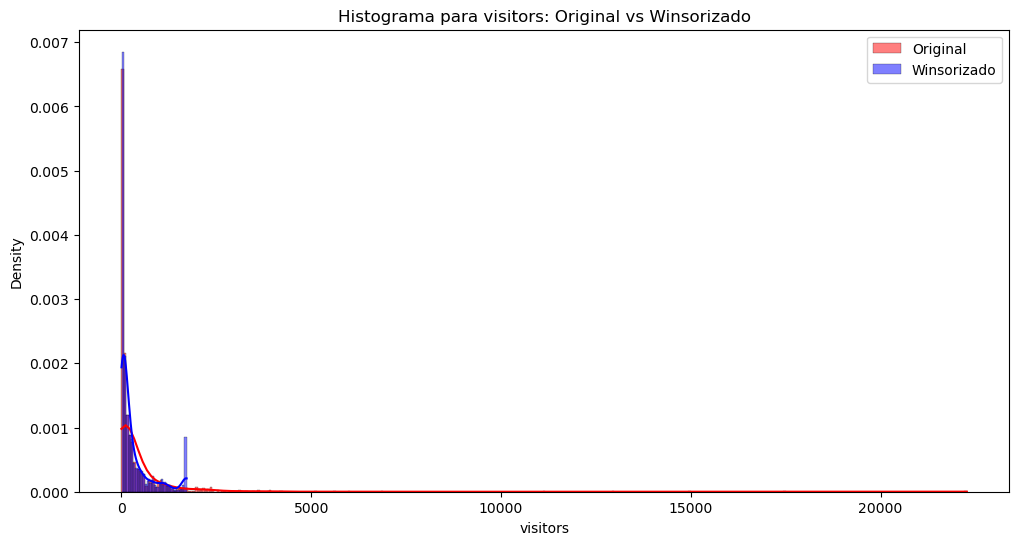

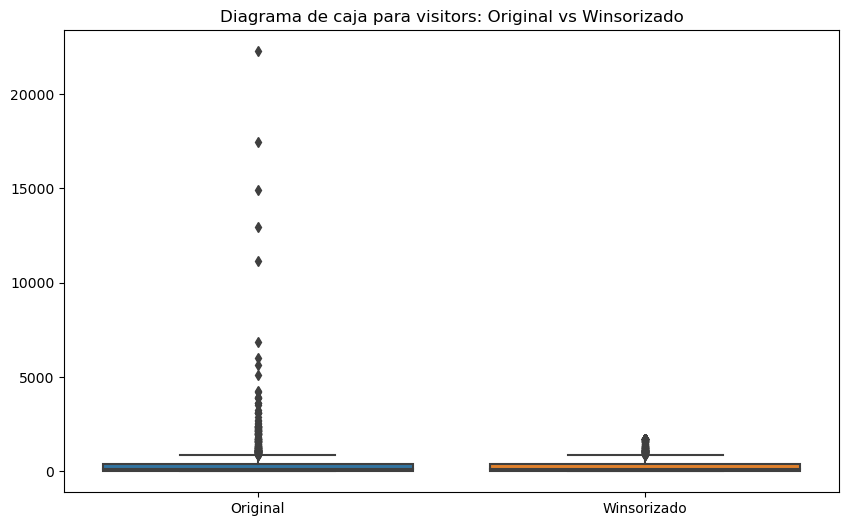

c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

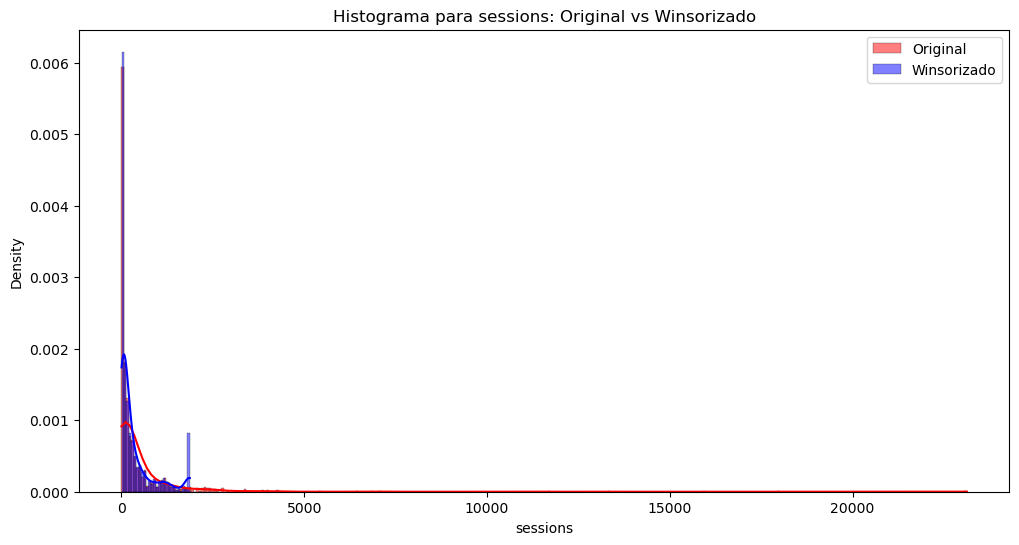

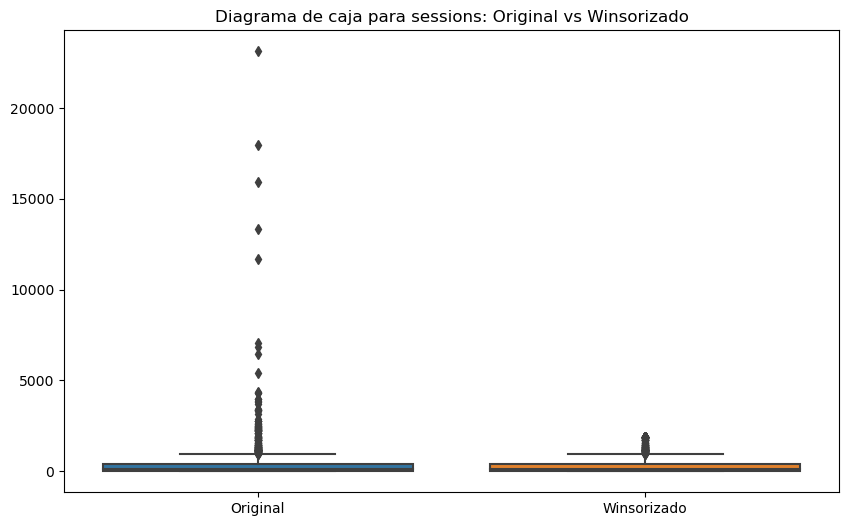

c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

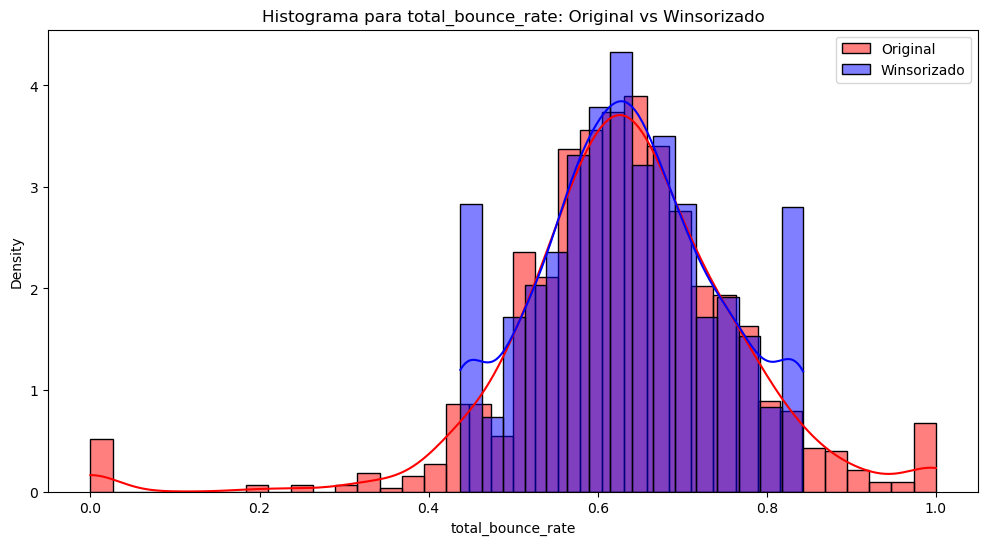

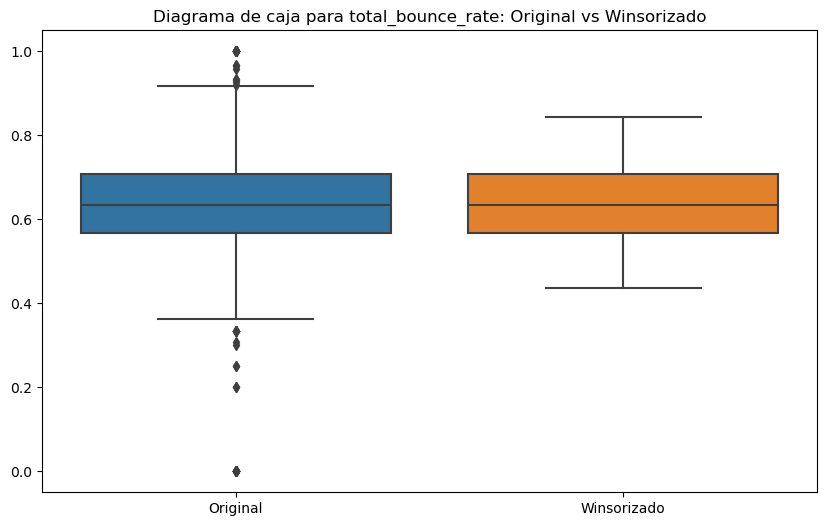

c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

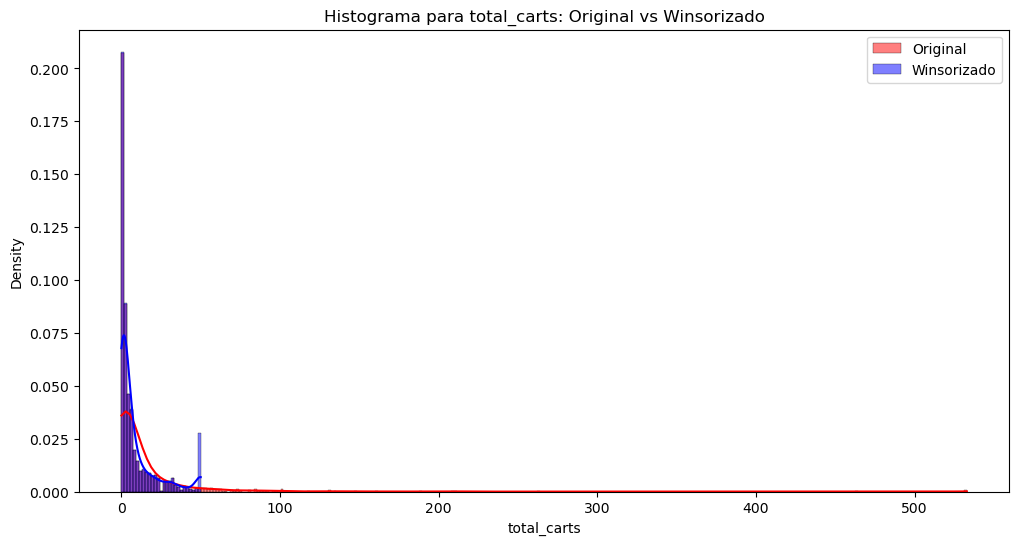

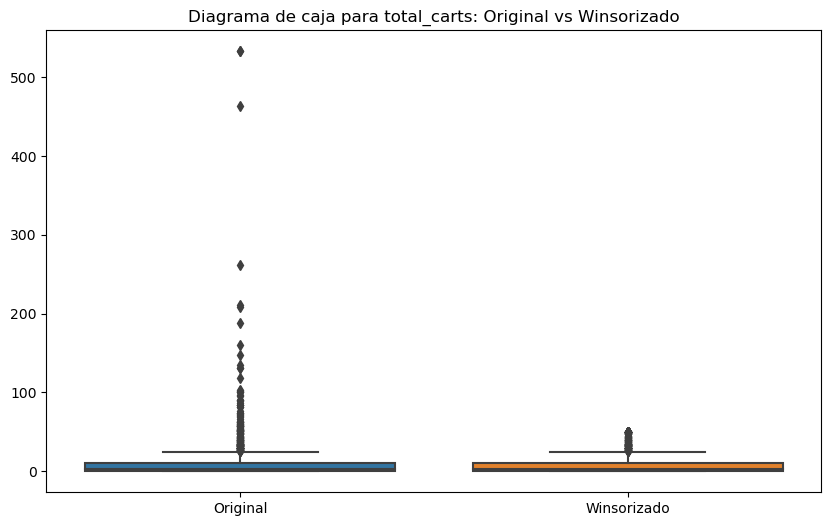

c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

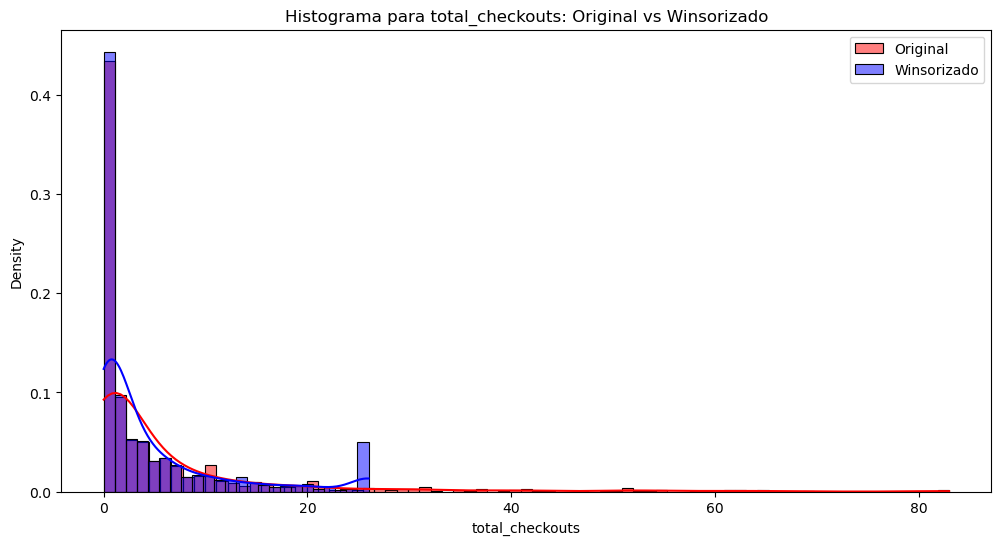

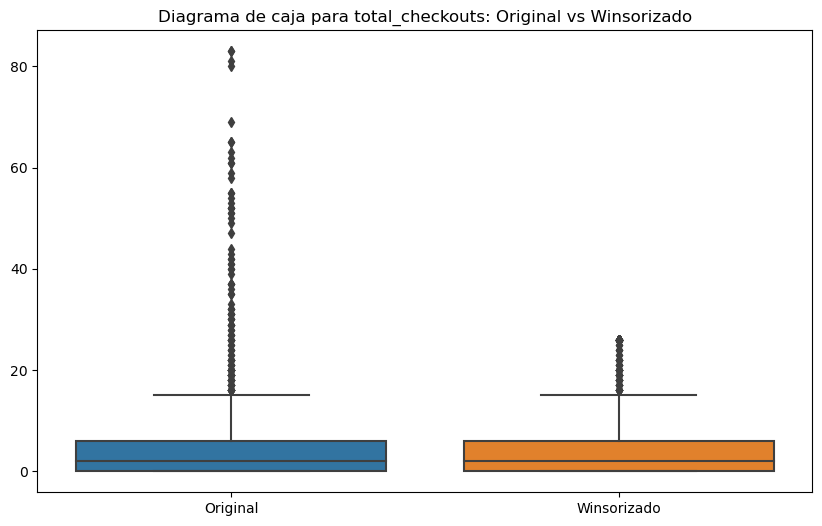

c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

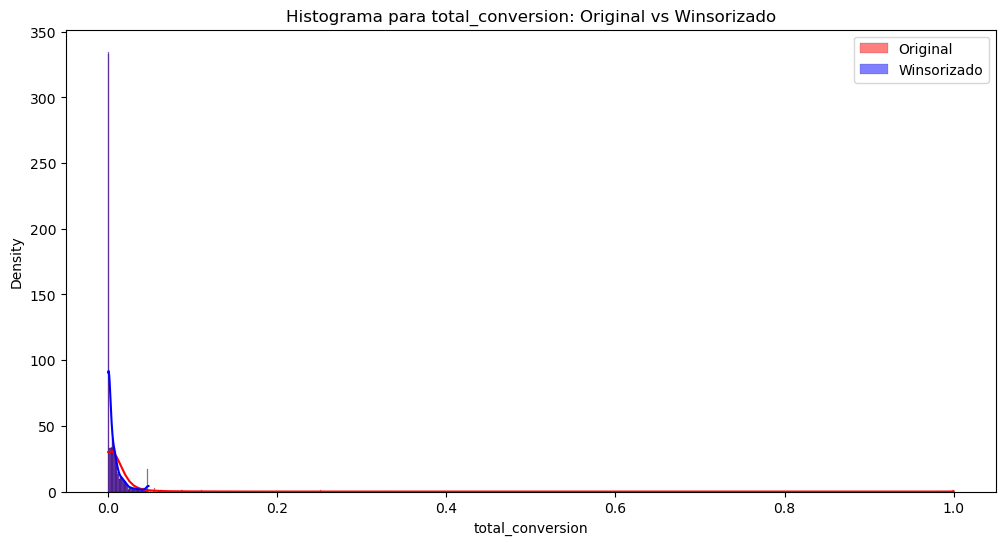

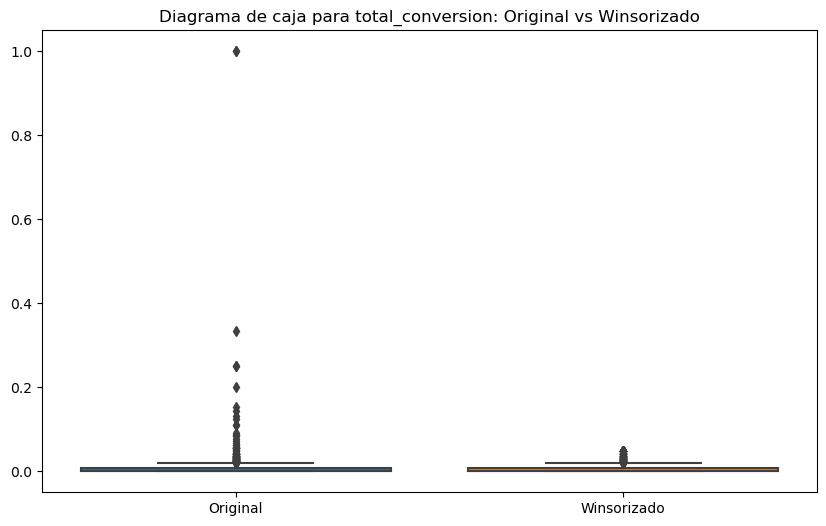

c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

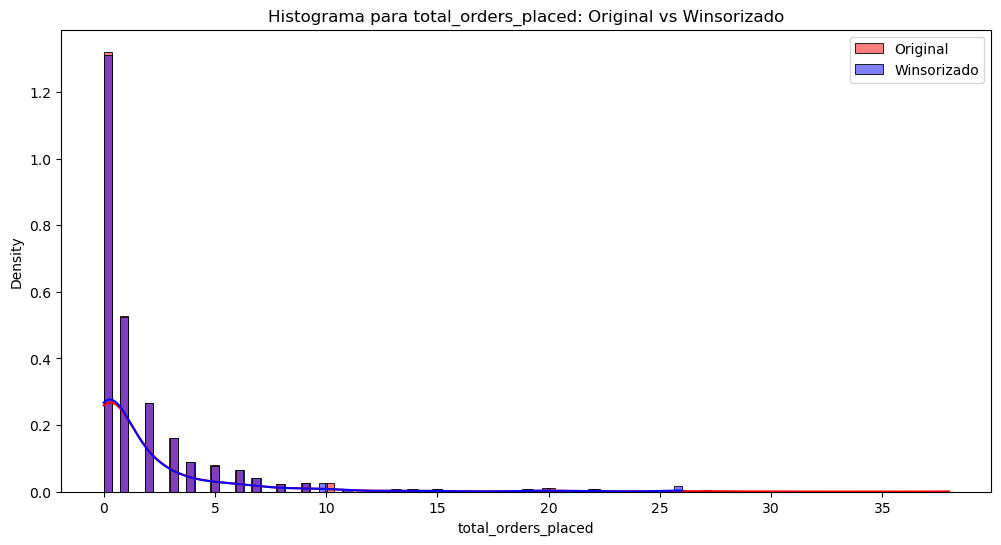

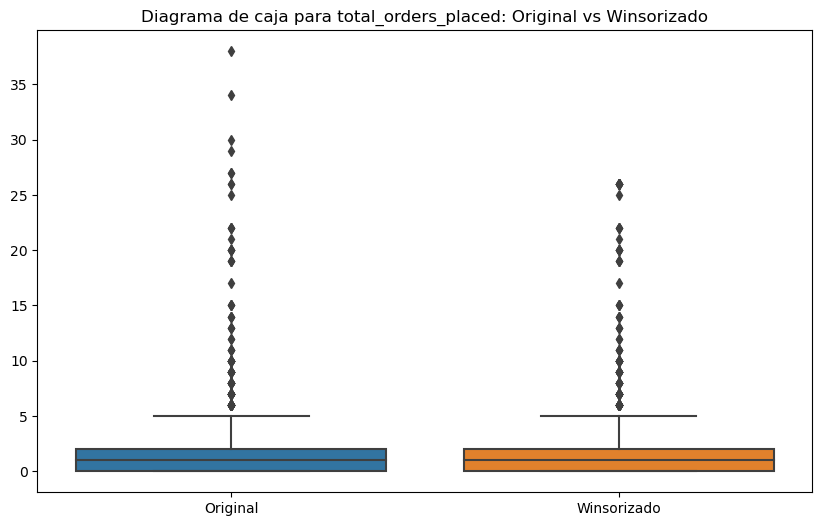

c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

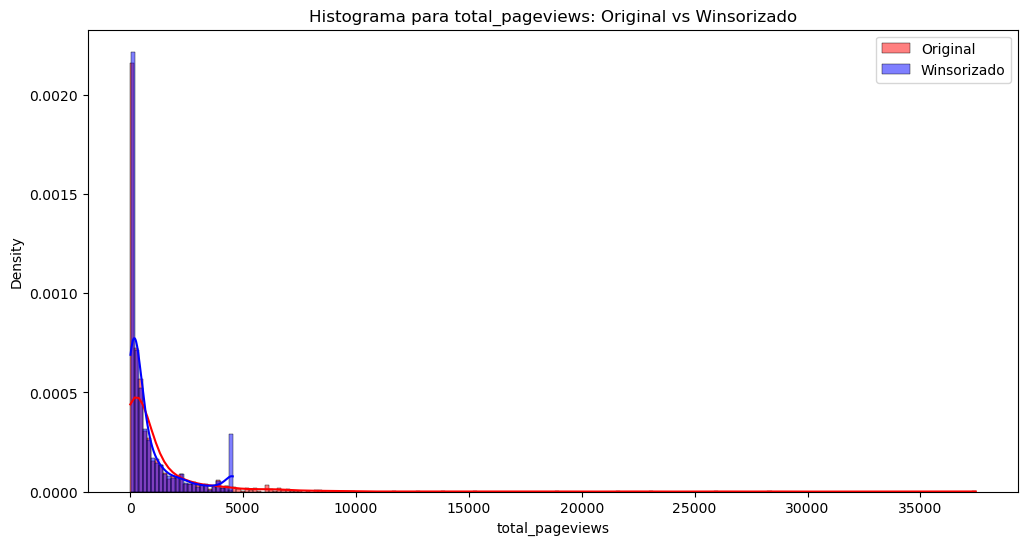

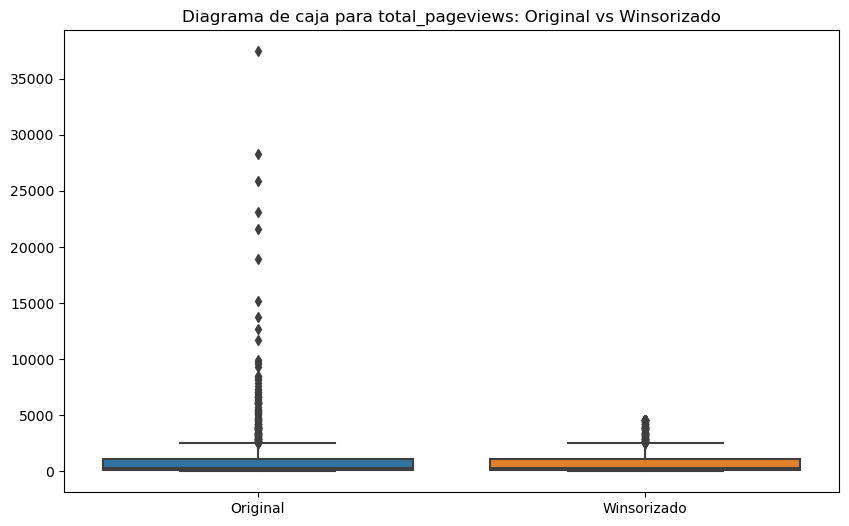

c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

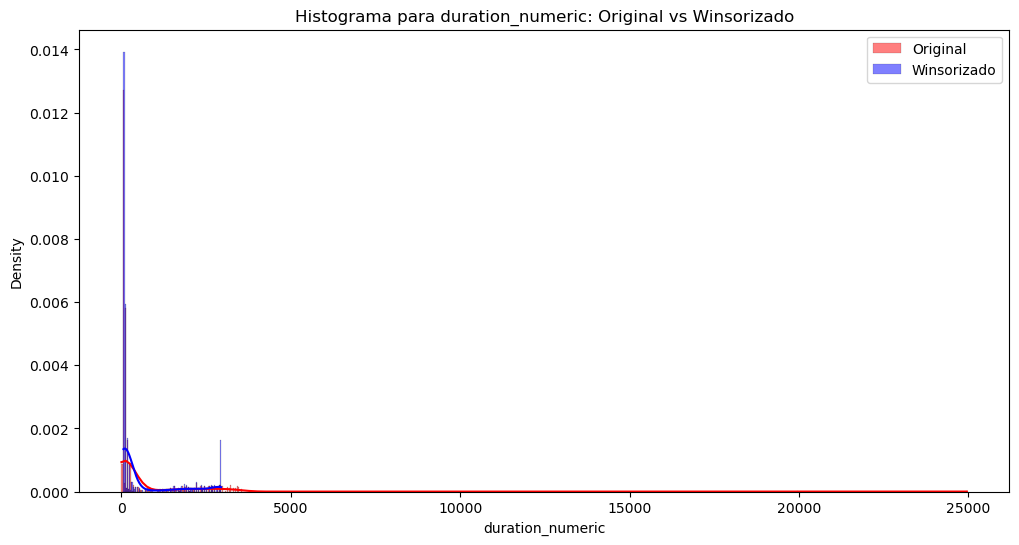

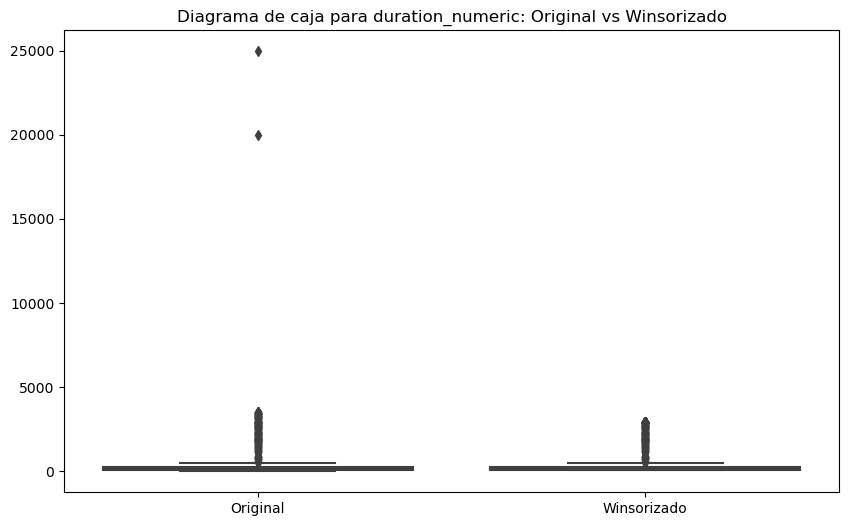

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar valores NaN
nan_count_original = df_winsor_original.isnull().sum().sum()
nan_count_winsor = df_winsor.isnull().sum().sum()

print(f"\nValores NaN en el DataFrame original: {nan_count_original}")
print(f"Valores NaN en el DataFrame con winsorización: {nan_count_winsor}")

# Visualizar las distribuciones antes y después de la winsorización con histogramas
columns_to_plot = ["visitors", "sessions", "total_bounce_rate", "total_carts", "total_checkouts", "total_conversion", "total_orders_placed", "total_pageviews", "duration_numeric"]

for column in columns_to_plot:
    # Histogramas antes y después
    plt.figure(figsize=(12, 6))
    sns.histplot(df_winsor_original[column], kde=True, color='red', label='Original', stat='density', alpha=0.5)
    sns.histplot(df_winsor[column], kde=True, color='blue', label='Winsorizado', stat='density', alpha=0.5)
    plt.title(f"Histograma para {column}: Original vs Winsorizado")
    plt.legend()
    plt.show()

    # Diagramas de caja para observar outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[df_winsor_original[column], df_winsor[column]], orient='v')
    plt.xticks([0, 1], ['Original', 'Winsorizado'])
    plt.title(f"Diagrama de caja para {column}: Original vs Winsorizado")
    plt.show()


# Resultados del Proceso de Winsorización

- Los histogramas 📊 y diagramas de caja 📦 más homogéneos sugieren que la **winsorización** redujo con éxito los ❗ **outliers** y estabilizó las distribuciones. Esto demuestra que el proceso aplicado fue efectivo.
- Este resultado es clave para asegurar la ✅ **calidad** y 🔎 **precisión** de los datos utilizados en análisis y modelos de aprendizaje automático si se hicieran.


### Guardamos el data frame tratado

In [85]:
# Guarda el DataFrame df_winsor en un archivo CSV
ecomerceclothes_sinout = "df_winsor_tratado.csv"  # Nombre del archivo CSV

# Guardar sin índice para evitar una columna adicional con índices de DataFrame
df_winsor.to_csv(ecomerceclothes_sinout, index=False)

print(f"DataFrame guardado en archivo CSV: {ecomerceclothes_sinout}")


DataFrame guardado en archivo CSV: df_winsor_tratado.csv
